In [1]:
import pandas as pd
import numpy as np
import cv2
import xml
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
import math
import warnings
from scipy import ndimage

Block 0102

In [2]:
# location of the files
block_0102 = '../../../Spring_2024/S_lab_TasselNet/Block_2_TN/Block_2_images_and_xml'

In [3]:
def chose_xml_and_jpeg(file_location):
    # list all files in location
    list_of_all_files = os.listdir(file_location)
    # sort files
    list_of_all_files.sort()
    # separate xml and jpeg files
    all_xml_files = [file for file in list_of_all_files if file.split('.')[-1] == 'xml']
    all_jpeg_files = [file for file in list_of_all_files if file not in all_xml_files]
    # get the final 20 files
    chosen_xml_files = all_xml_files[-20:]
    chosen_jpeg_files = all_jpeg_files[-20:]
    # make sure the xml and jpeg files correspond to each other?
    mean = np.mean([file.split('.')[0] for file in chosen_xml_files] == [file.split('.')[0] for file in chosen_jpeg_files])

    # chose the required files only
    task_specific_image_files = chosen_jpeg_files[:13]
    task_specific_xml_files = chosen_xml_files[-7:]
    return(task_specific_image_files, task_specific_xml_files, mean)

In [4]:
task_spec_im_files_0102, task_spec_xml_files_0102, mean_0102 = chose_xml_and_jpeg(block_0102)

In [9]:
# task_spec_im_files_0102

In [11]:
# task_spec_xml_files_0102

In [13]:
# mean_0102

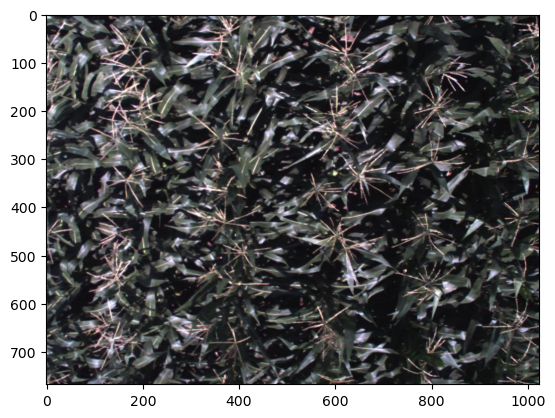

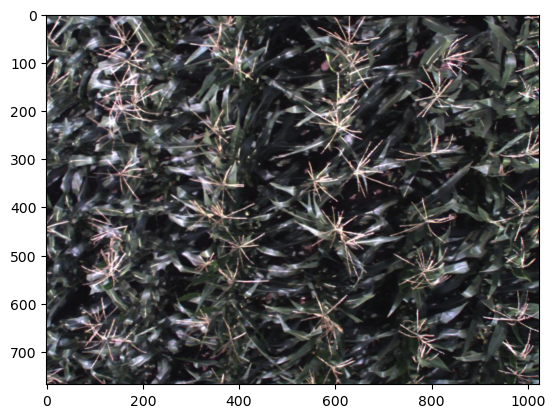

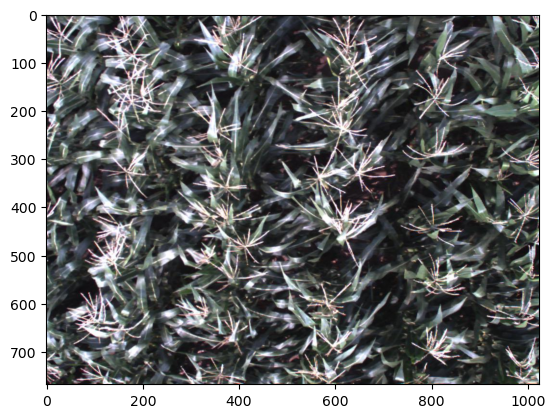

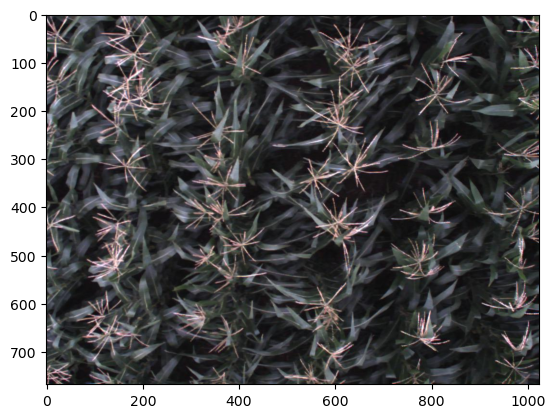

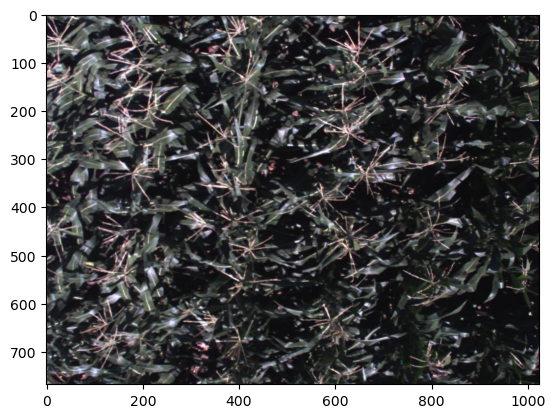

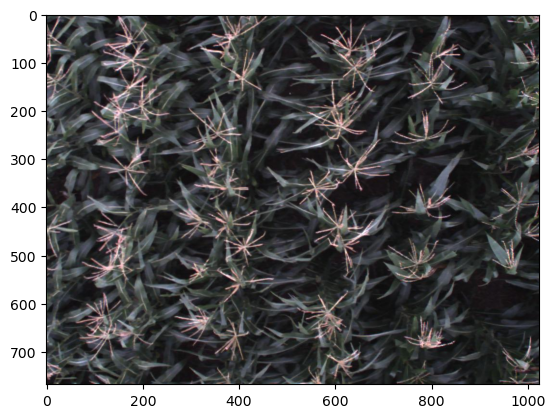

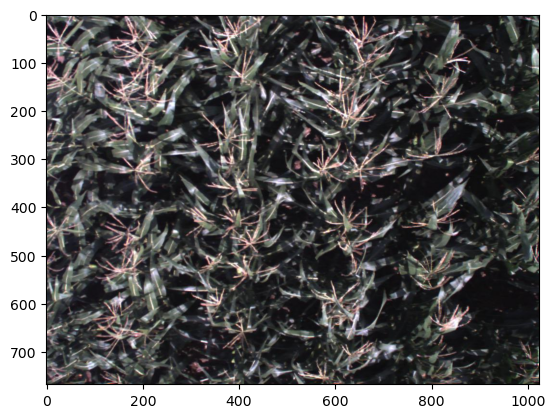

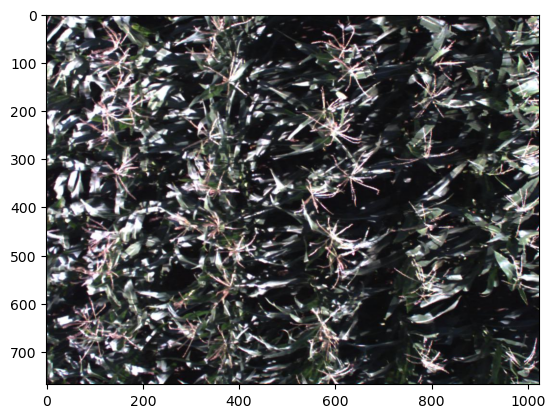

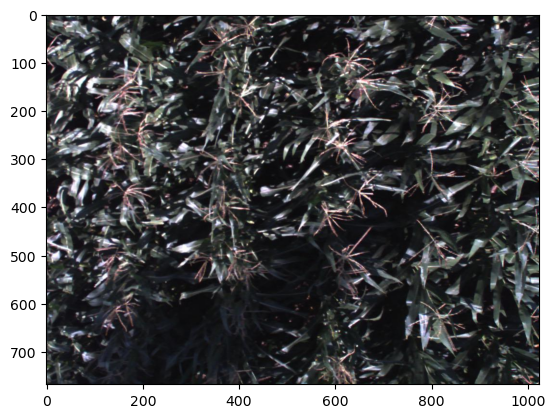

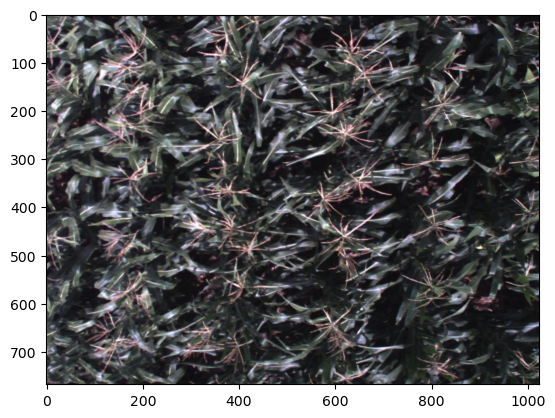

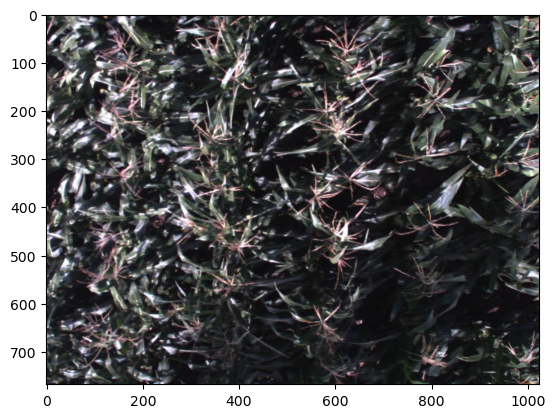

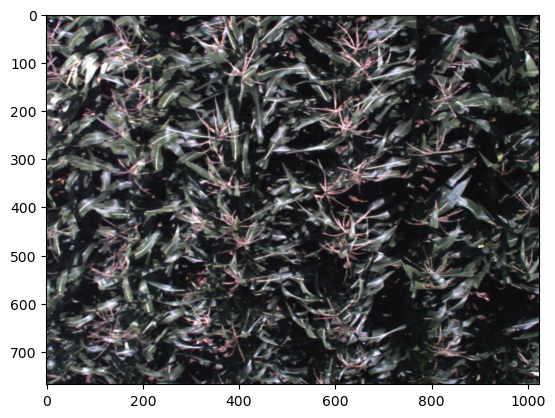

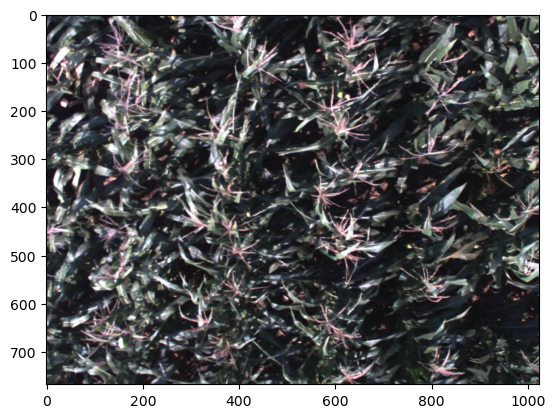

In [14]:
images_0102 = []
for file in task_spec_im_files_0102:
    joined_path = os.path.join(block_0102, file)
    read_image = plt.imread(joined_path)
    plt.imshow(read_image)
    plt.show()
    images_0102.append(read_image)

In [15]:
def create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, im_list):
    # initiate an empty list
    catch_all_subwindows = []
    sub_window_name_list = []
    counter = 0
    for i in range(0, im_height, stride):
        for j in range(0, im_width, stride):
            local_list_at_subimage_sequence_level= []
            for im_file in im_list:
                chosen_window = im_file[i:i+kernel_size, j:j+kernel_size, :]
                # resize the window
                chosen_window = resize(chosen_window, (kernel_size, kernel_size ,n_channels))
                local_list_at_subimage_sequence_level.append(chosen_window)
            catch_all_subwindows.append(local_list_at_subimage_sequence_level)
            sub_window_name_list.append("sub_image_seq_" + str(counter))
            counter = counter + 1
    # stack all these together
    Stacked_subwindows = np.stack(catch_all_subwindows)
    return(Stacked_subwindows, sub_window_name_list)

In [16]:
%%time

# get the function output

image_height = images_0102[0].shape[0]
image_weight = images_0102[0].shape[1]
stride = 8
kernel_size = 32
n_channels =3

stacked_sub_windows_0102, sub_window_name_list = create_and_stack_subwindows(image_height, image_weight, stride, kernel_size, n_channels, images_0102)

CPU times: user 40.2 s, sys: 4.09 s, total: 44.3 s
Wall time: 44.4 s


In [18]:
len(sub_window_name_list)

12288

In [20]:
sub_window_name_list[0], sub_window_name_list[1], sub_window_name_list[-1]

('sub_image_seq_0', 'sub_image_seq_1', 'sub_image_seq_12287')

In [19]:
stacked_sub_windows_0102.shape

(12288, 13, 32, 32, 3)

In [21]:
np.save('All_data/block_0102/subwindow_seqs_0102.npy', stacked_sub_windows_0102)

In [22]:
# xml files
task_spec_xml_files_0102

['Block0102_2020_08_26.xml',
 'Block0102_2020_08_27.xml',
 'Block0102_2020_08_28.xml',
 'Block0102_2020_08_31.xml',
 'Block0102_2020_09_02.xml',
 'Block0102_2020_09_07.xml',
 'Block0102_2020_09_16.xml']

In [28]:
# Corresponding image files
response_image_files_0102 = [file.split('.')[0] + '.jpeg' for file in task_spec_xml_files_0102]

In [29]:
response_image_files_0102

['Block0102_2020_08_26.jpeg',
 'Block0102_2020_08_27.jpeg',
 'Block0102_2020_08_28.jpeg',
 'Block0102_2020_08_31.jpeg',
 'Block0102_2020_09_02.jpeg',
 'Block0102_2020_09_07.jpeg',
 'Block0102_2020_09_16.jpeg']

In [30]:
# sort the file lists first just in case
task_spec_xml_files_0102.sort()
response_image_files_0102.sort()

In [31]:
len(task_spec_xml_files_0102), len(response_image_files_0102)

(7, 7)

In [32]:
# need the function for storing the np files
def store_images_as_np_arrays_horizontal(img_old_path, img_name, img_store_path):
    # join the path
    image_path = os.path.join(img_old_path, img_name)
    # read the image
    read_image = plt.imread(image_path)
    image_size = read_image.shape
    # show the image
    plt.imshow(read_image)
    plt.show()
    # save the image in new location
    np.save(img_store_path + '/' + img_name.split(".")[0] + '.npy', read_image)
    return(image_size)

In [33]:
old_path = block_0102
old_path

'../../../Spring_2024/S_lab_TasselNet/Block_2_TN/Block_2_images_and_xml'

In [ ]:
new_store_path = 'All_data/block_0102/all_np_files'

In [ ]:
all_im_sizes_0102 = []
for file in response_image_files_0102:
    im_size = store_images_as_np_arrays_horizontal(old_path, file, new_store_path)
    all_im_sizes_0102.append(im_size)

In [ ]:
# all_means = []
# for i in range(12288):
#     all_means.append((np.mean(stack_alt[i, :,:,:,:] == final_function_subs[i,:,:,:,:])))

# np.mean(all_means)